In [25]:
# import dependencies

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [26]:
# read in sample data

rpsls_game_df = pd.read_csv('gamedata.csv')
print(len(rpsls_game_df))
rpsls_game_df.head(11)

473


,Game ID,Round,Computer Choice,Player Choice,Round Winner
0,589051,1,paper,scissors,Player
1,589051,2,paper,scissors,Player
2,589051,3,paper,rock,Computer
3,589051,4,scissors,rock,Player
4,589051,5,lizard,lizard,Draw
5,589051,6,rock,scissors,Computer
6,589051,7,paper,rock,Computer
7,589051,8,scissors,scissors,Draw
8,589051,9,spock,scissors,Computer
9,589051,10,rock,scissors,Computer


In [27]:
# make a plotly histogram of player choices
fig = go.Figure()
fig.add_trace(go.Histogram(x=rpsls_game_df['Player Choice'], name='Player Choice'))
fig.add_trace(go.Histogram(x=rpsls_game_df['Computer Choice'], name='Computer Choice'))

fig.update_layout(
    barmode='overlay',
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor="LightSteelBlue",
).update_traces(opacity=0.75)

fig.show()

In [28]:
# Calculate counts
player_choice_counts = rpsls_game_df['Player Choice'].value_counts()
computer_choice_counts = rpsls_game_df['Computer Choice'].value_counts()

# Create plotly bar chart
fig = go.Figure()

# Add player choice counts
fig.add_trace(go.Bar(
    x=player_choice_counts.index,
    y=player_choice_counts.values,
    name='Player Choice'
))

# Add computer choice counts
fig.add_trace(go.Bar(
    x=computer_choice_counts.index,
    y=computer_choice_counts.values,
    name='Computer Choice'
))

fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor="LightSteelBlue",
    barmode='group'  # Display bars side by side
)

fig.show()


In [29]:
# create a chart that shows player wins, computer wins, and ties
# Calculate counts
player_wins = rpsls_game_df['Round Winner'].value_counts()

# Create plotly bar chart
fig = go.Figure()

# Add player wins
fig.add_trace(go.Bar(
    x=player_wins.index,
    y=player_wins.values,
    name='Wins'
))

fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [30]:
# create a supervised learning machine to predict the computer's choice based on the player's choice

# create a label encoder
le = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Player Choice', 'Computer Choice', 'Round Winner']

# Loop through the list and encode each column
for column in columns_to_encode:
    rpsls_game_df[f'{column} Encoded'] = le.fit_transform(rpsls_game_df[column])

# Display the first few rows of the cleaned dataset to confirm the encoding
rpsls_game_df.head(11)

# Split the data into features and target
X = rpsls_game_df[['Player Choice Encoded']]
y = rpsls_game_df['Computer Choice Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Display the classification report
print(classification_report(y_test, y_pred))





0.18487394957983194
[[ 5  3  3  5  7]
 [ 4  3  2  7  6]
 [ 7  7  6  4  6]
 [ 5  3  4  4  3]
 [10  6  3  2  4]]
              precision    recall  f1-score   support

           0       0.16      0.22      0.19        23
           1       0.14      0.14      0.14        22
           2       0.33      0.20      0.25        30
           3       0.18      0.21      0.20        19
           4       0.15      0.16      0.16        25

    accuracy                           0.18       119
   macro avg       0.19      0.18      0.18       119
weighted avg       0.20      0.18      0.19       119



In [31]:
# create a supervised learning machine to predict the round winner based on the player's choice and the computer's choice
# Split the data into features and target
X = rpsls_game_df[['Player Choice Encoded', 'Computer Choice Encoded']]
y = rpsls_game_df['Round Winner Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Display the classification report
print(classification_report(y_test, y_pred))



1.0
[[55  0  0]
 [ 0 21  0]
 [ 0  0 43]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        43

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



In [32]:
# get feature importances array
importances = rf.feature_importances_
# list top 10 most important features
importances_sorted = sorted(zip(rf.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.5071150162348418, 'Player Choice Encoded'),
 (0.49288498376515827, 'Computer Choice Encoded')]

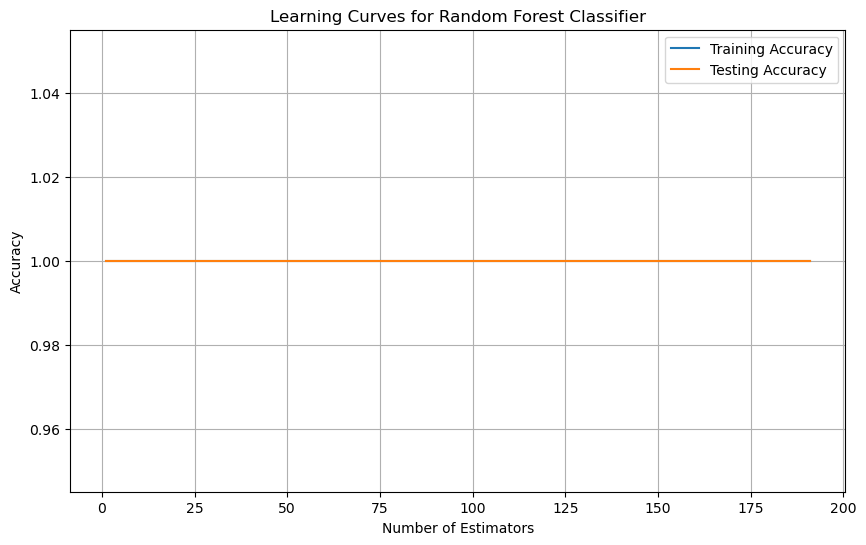

In [33]:
# Lists to store the accuracies
train_accuracies = []
test_accuracies = []

# Vary the number of estimators
n_estimators_range = range(1, 201, 10)  # From 1 to 200, stepping by 10

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict and calculate accuracy on the training set
    y_train_pred = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Predict and calculate accuracy on the testing set
    y_test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy')
plt.plot(n_estimators_range, test_accuracies, label='Testing Accuracy')
plt.title('Learning Curves for Random Forest Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


0.453781512605042
[[42  0 13]
 [21  0  0]
 [31  0 12]]
              precision    recall  f1-score   support

           0       0.45      0.76      0.56        55
           1       0.00      0.00      0.00        21
           2       0.48      0.28      0.35        43

    accuracy                           0.45       119
   macro avg       0.31      0.35      0.31       119
weighted avg       0.38      0.45      0.39       119



c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



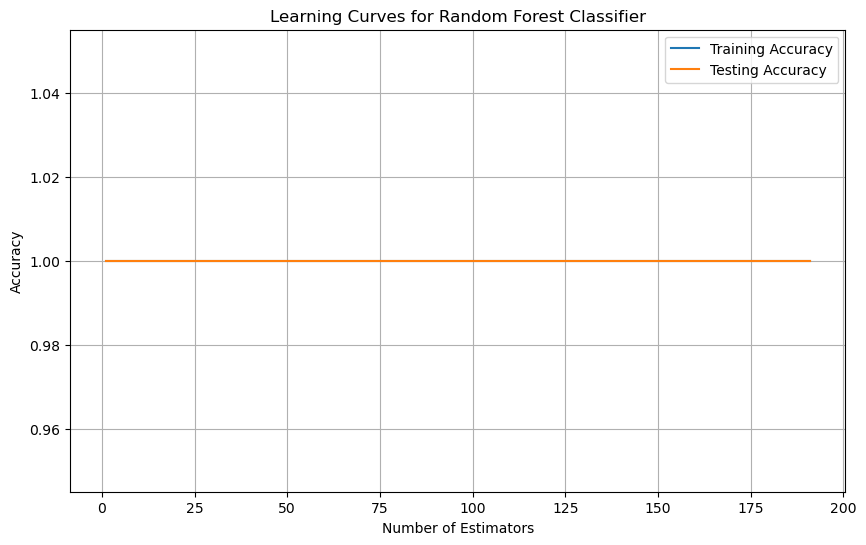

In [34]:
# Create a logistic regression classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Display the classification report
print(classification_report(y_test, y_pred))

# Lists to store the accuracies
train_accuracies = []
test_accuracies = []

# Vary the number of estimators
n_estimators_range = range(1, 201, 10)  # From 1 to 200, stepping by 10

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict and calculate accuracy on the training set
    y_train_pred = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Predict and calculate accuracy on the testing set
    y_test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy')
plt.plot(n_estimators_range, test_accuracies, label='Testing Accuracy')
plt.title('Learning Curves for Random Forest Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [35]:
# create reinforcement learning machine to predict the computer's choice based on the player's choice from tensorflow agents
# import dependencies
import tensorflow as tf
from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.environments import suite_atari
from tf_agents.environments import tf_py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import py_environment
from tf_agents.environments import utils
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.environments import suite_atari
from tf_agents.environments import tf_py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import py_environment
from tf_agents.environments import utils
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym

# Create a custom environment
class RPSLSEnvironment(py_environment.PyEnvironment):
    def __init__(self):
        self._action_spec = tf_agents.specs.BoundedArraySpec(
            shape=(), dtype=np.int32, minimum=0, maximum=4, name='action')
        self._observation_spec = tf_agents.specs.BoundedArraySpec(
            shape=(1,), dtype=np.int32, minimum=0, maximum=4, name='observation')
        self._state = 0
        self._episode_ended = False

    def action_spec(self):
        return self._action_spec

    def observation_spec(self):
        return self._observation_spec

    def _reset(self):
        self._state = 0
        self._episode_ended = False
        return tf_agents.trajectories.time_step.restart(np.array([self._state], dtype=np.int32))

    def _step(self, action):
        if self._episode_ended:
            return self.reset()
        if action == self._state:
            reward = 0
        elif (action == 0 and self._state == 1) or (action == 1 and self._state == 2) or (action == 2 and self._state == 3) or (action == 3 and self._state == 4) or (action == 4 and self._state == 0):
            reward = 1
        else:
            reward = -1
        self._state = action
        if self._state == 4:
            self._episode_ended = True
        return tf_agents.trajectories.time_step.transition(np.array([self._state], dtype=np.int32), reward=reward)
    
# Create the environment
environment = RPSLSEnvironment()

# Wrap the environment
environment = wrappers.TimeLimit(environment, duration=10)

# Create the TensorFlow environment
tf_env = tf_py_environment.TFPyEnvironment(environment)

# Create the agent
agent = tf_agents.agents.dqn.dqn_agent.DqnAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    q_network=tf_agents.networks.q_network.QNetwork(
        tf_env.time_step_spec(),
        tf_env.action_spec(),
        fc_layer_params=(100,)),
    optimizer=tf.compat.v1.train.AdamOptimizer(0.001))

# Initialize the agent
agent.initialize()

# Create the replay buffer
replay_buffer = tf_agents.replay_buffers.tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=tf_env.batch_size,
    max_length=1000)

# Create the dataset
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3,
    sample_batch_size=64,
    num_steps=2).prefetch(3)

# Create the collect driver
collect_driver = tf_agents.drivers.dynamic_step_driver.DynamicStepDriver(
    tf_env,
    agent.collect_policy,
    observers=[replay_buffer.add_batch],
    num_steps=2)



ImportError: This version of TensorFlow Probability requires TensorFlow version >= 2.15; Detected an installation of version 2.10.0. Please upgrade TensorFlow to proceed.